# Data download and packages install

In [1]:
!/usr/bin/curl -OJ https://girder.hub.yt/api/v1/file/57fcf27bb8805f000164ab40/download


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Refusing to overwrite gaia_validp.h5: File exists
curl: (23) Failed writing body (0 != 4096)


In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt



In [11]:
data = {}
with h5py.File("gaia_validp.h5") as f:
    for k in f:
        data[k] = f[k][:]

# Examine the Gaia data

In [12]:
print(data.keys())


dict_keys(['dec', 'pmra', 'phot_g_mean_mag', 'parallax', 'ra', 'pmdec'])


In [13]:
# try to see the subset of data
print(data)

{'dec': array([ 0.23539165,  0.20006769,  0.24882544, ..., -0.34317732,
       -0.2281136 , -0.22130082]), 'pmra': array([ 43.75231342,  10.036263  ,   2.93228368, ...,  15.71355591,
        11.35288892,   2.89787878]), 'phot_g_mean_mag': array([  7.99137783,  10.58095872,  10.74310238, ...,   9.23885216,
         9.01706935,   9.73257118]), 'parallax': array([ 6.35295075,  3.90032894,  3.15531322, ...,  6.03693811,
        1.48414231,  2.68011134]), 'ra': array([  45.03433035,   45.16500677,   45.08615484, ...,  315.28287959,
        314.74064816,  314.9607306 ]), 'pmdec': array([ -7.64198999, -55.10917286,  -1.6028671 , ..., -27.85234475,
         1.84710791,   3.15173424])}


In [8]:
# The data type is dictionary
type(data)

dict

In [20]:
# The length of the array under each key
len(data.get('ra'))

2057050

# Try different plots

In [ ]:
# try to plot something 
plt.plot([1,2,3,4],[2,4,6,8])

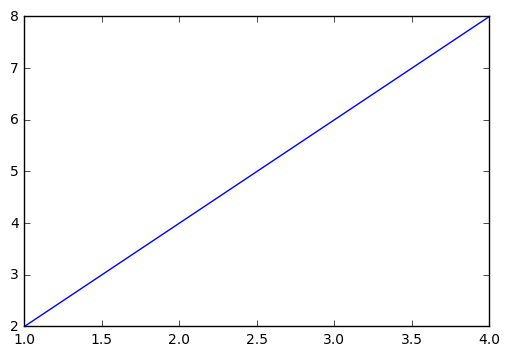

In [22]:
# show the graph
plt.show()

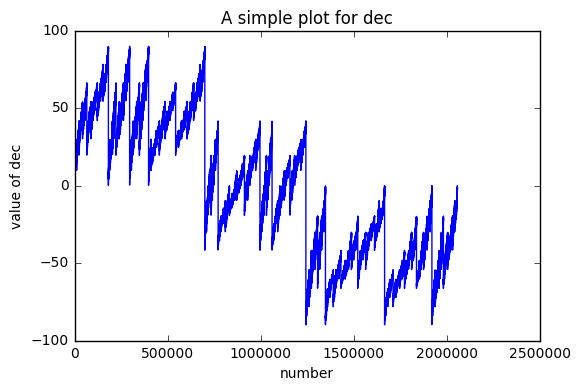

In [109]:
# plot the dec array from the gaia data and add a title for the graph，labels for x-axis and y-axis. 
# x-axis record the number of stars，and y-axis record the dec values for them.
plt.plot(data.get('dec'))
plt.title('A simple plot for dec')
plt.ylabel('value of dec')
plt.xlabel('number')
plt.show()

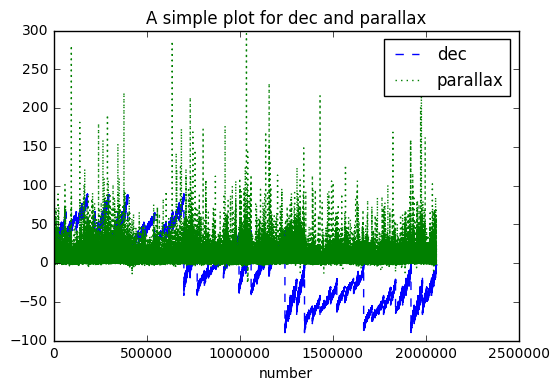

In [110]:
# try to show the value for dec and parallax on the same graph, set the color and shape for each point,
# but the result is not very well. Since the points are so dense that the points for dec and parallax are overlapped. 
# Then, it is hard to tell the differences，since the dense places all look the same.
plt.plot(data.get('dec'),'b--',label='dec')
plt.plot(data.get('parallax'),'g:',label='parallax')
plt.title('A simple plot for dec and parallax')
plt.xlabel('number')
plt.legend(loc='upper right')
plt.show()

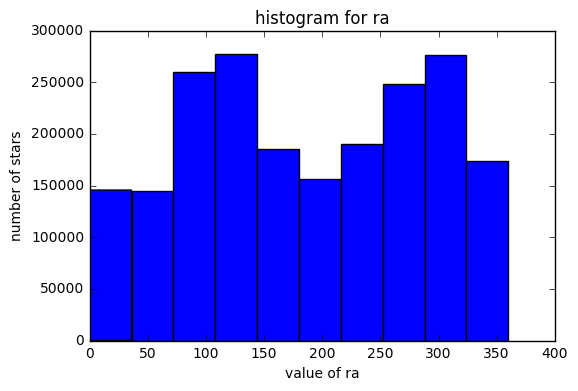

In [90]:
# histogram for ra values
np.random.seed(0)
plt.hist(data['ra'])
plt.axis([0, 400, 0, 300000])
plt.title('histogram for ra')
plt.ylabel('number of stars')
plt.xlabel('value of ra')
plt.show()

In [59]:
# use numpy to get the mean for the array 'ra'
arr= data.get('ra')
np.mean(arr, axis=0)

187.16576281589178

In [60]:
# standard deviation for array 'ra'
np.std(arr, axis=0)

100.14074979889315

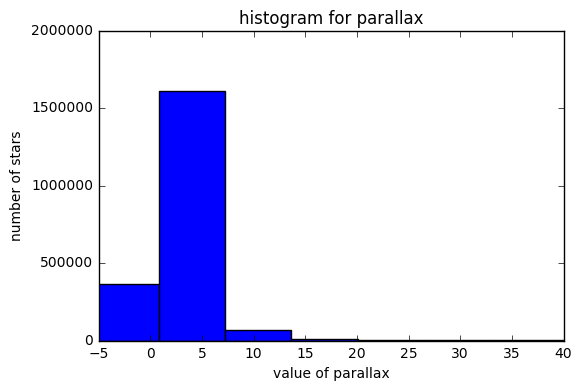

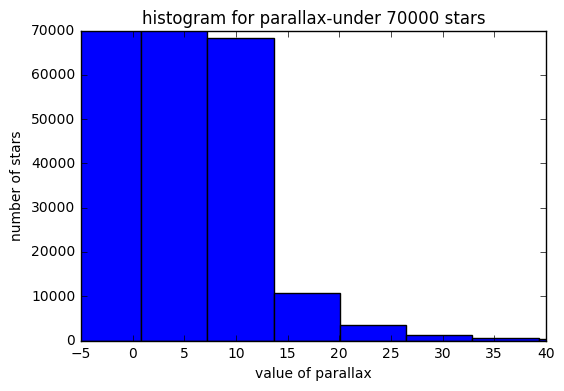

In [92]:
# histogram for parallax values, while the small number under 70000 is hard to see in the graph
# Even if we set bins=50, the number of bins in the graph is less than 10 in the graph. 
# Some people think it is due to the distant outliers in the graph 
# ---- http://stackoverflow.com/questions/39351960/how-to-change-number-of-bins-in-matplotlib
np.random.seed(0)
plt.hist(data['parallax'],bins=50)
plt.axis([-5, 40, 0, 2000000])
plt.title('histogram for parallax')
plt.ylabel('number of stars')
plt.xlabel('value of parallax')
plt.show()
np.random.seed(0)
plt.hist(data['parallax'],bins=50)
plt.axis([-5, 40, 0, 70000])
plt.title('histogram for parallax-under 70000 stars')
plt.ylabel('number of stars')
plt.xlabel('value of parallax')
plt.show()

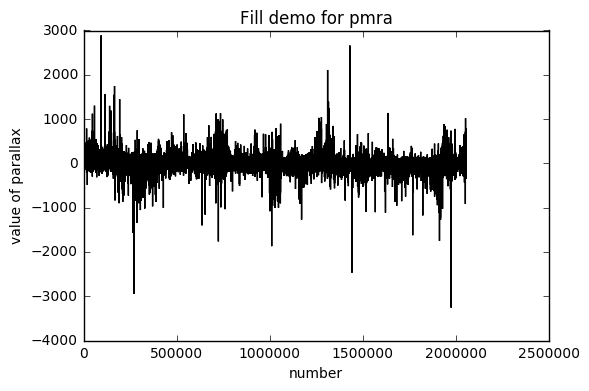

In [112]:
# try fill demo graph for pmra
np.random.seed(0)
plt.fill(data['pmra'])
plt.title('Fill demo for pmra')
plt.ylabel('value of parallax')
plt.xlabel('number')
plt.show()

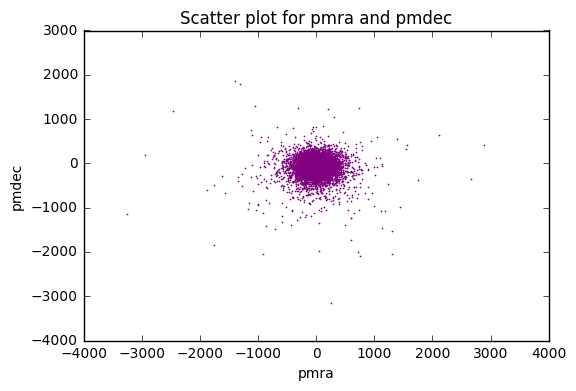

In [108]:
# A 2D scatter plot for pmdec and pmra
plt.scatter(data['pmra'], data['pmdec'], s=0.01, color='purple', marker='*')
plt.title('Scatter plot for pmra and pmdec')
plt.ylabel('pmdec')
plt.xlabel('pmra')
plt.show()